In [1]:
import csv
import matplotlib.pyplot as plt 
import requests
import json
import pandas as pd 
from config import api_key
from yelpapi import YelpAPI
import argparse

from pprint import pprint

argparser = argparse.ArgumentParser(description='Example Yelp queries using yelpapi. Visit https://www.yelp.com/developers/v3/manage_app to get the necessary API keys.')
argparser.add_argument(api_key, type=str, help='Yelp Fusion API Key')

_StoreAction(option_strings=[], dest='t9Aqpq086bS4P_h7RY-fgMeMbrrKr-D_cdrrllrO8gCuPPyY3K7V6ELW_OFMKvoI3wa4jlx0ahhlESLkb4YQsTmiWMtiZhWlwu9eMhtKWZL5OrtqRmUBu2IAQa9pXXYx', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='Yelp Fusion API Key', metavar=None)

In [2]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [3]:
#Request to pull the number of restaurants each city that offer Reservations
yelp_api = YelpAPI(api_key)

# Reservations in restaurants in LA
wc_la_results = yelp_api.search_query(term='restaurants', location='los angeles, ca', attributes="reservation")
pprint(wc_la_results['total'])

# Reservations in restaurants in DC
wc_dc_results = yelp_api.search_query(term='restaurants', location='washington, dc', attributes="reservation")
pprint(wc_dc_results['total'])

# Reservations in restaurants in Miami
wc_mia_results = yelp_api.search_query(term='restaurants', location='miami, fl', attributes="reservation")
pprint(wc_mia_results['total'])

# Reservations in restaurants in Chicago
wc_chi_results = yelp_api.search_query(term='restaurants', location='chicago, il', attributes="reservation")
pprint(wc_chi_results['total'])

500
127
105
106


In [4]:
#Create DataFrame to hold reservation results
reservation_dict= ({"Los Angeles": wc_la_results,
                "DC": wc_dc_results,
                "Miami": wc_mia_results,
                "Chicago": wc_chi_results  
})

reservation_data = pd.DataFrame(reservation_dict)
reservation_data

,Los Angeles,DC,Miami,Chicago
businesses,"[{'id': 'a3jEpK3LAmrsxIg-nC2WvQ', 'alias': 'mi...","[{'id': 'CUdMdzv2aHDarw59h8VqHw', 'alias': 'no...","[{'id': 'opz-z4k-WK0KsyyR1Vwg5A', 'alias': 'wh...","[{'id': 'VPJk-SEWSWS_nGoQvM-COw', 'alias': 'pe..."
region,"{'center': {'longitude': -118.32138061523438, ...","{'center': {'longitude': -77.0306396484375, 'l...","{'center': {'longitude': -80.2880859375, 'lati...","{'center': {'longitude': -87.67776489257812, '..."
total,500,127,105,106


In [5]:
# Delete extraneous columns
reservation_data.drop(['businesses', 'region'], inplace=True)
reservation_data.head()

,Los Angeles,DC,Miami,Chicago
total,500,127,105,106


In [6]:
#Request to pull the number of restaurants in each city that offer Wait List Availability
yelp_api = YelpAPI(api_key)

# Reservations and Wait List Availability in restaurants in LA
wc_la_results = yelp_api.search_query(term='restaurants', location='los angeles, ca', attributes="waitlist_reservation")
pprint(wc_la_results['total'])

# Reservations and Wait List Availability in restaurants in DC
wc_dc_results = yelp_api.search_query(term='restaurants', location='washington, dc', attributes="waitlist_reservation")
pprint(wc_dc_results['total'])

# Reservations and Wait List Availability in restaurants in Miami
wc_mia_results = yelp_api.search_query(term='restaurants', location='miami, fl', attributes="waitlist_reservation")
pprint(wc_mia_results['total'])

# Reservations and Wait List Availability in restaurants in Chicago
wc_chi_results = yelp_api.search_query(term='restaurants', location='chicago, il', attributes="waitlist_reservation")
pprint(wc_chi_results['total'])


87
38
13
69


In [7]:
#Create DataFrame to hold results
waitlist_dict= ({"Los Angeles": wc_la_results,
                "DC": wc_dc_results,
                "Miami": wc_mia_results,
                "Chicago": wc_chi_results  
})

waitlist_data = pd.DataFrame(waitlist_dict)
waitlist_data

,Los Angeles,DC,Miami,Chicago
businesses,"[{'id': 'kdTFcDSl9vAR-btEm1Q2uw', 'alias': 'ba...","[{'id': 'ZQmeDA4ZkM6F1dr2HNVWXA', 'alias': 'ca...","[{'id': '1h8-r9cLeXxW99HhlRUnlA', 'alias': 'cv...","[{'id': 'DXwSYgiXqIVNdO9dazel6w', 'alias': 'pe..."
region,"{'center': {'longitude': -118.32138061523438, ...","{'center': {'longitude': -77.0306396484375, 'l...","{'center': {'longitude': -80.2880859375, 'lati...","{'center': {'longitude': -87.67776489257812, '..."
total,87,38,13,69


In [8]:
# Drop businesses & region from dataframe
waitlist_data.drop(['businesses', 'region'], inplace=True)
waitlist_data

,Los Angeles,DC,Miami,Chicago
total,87,38,13,69


C:\Users\leite\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


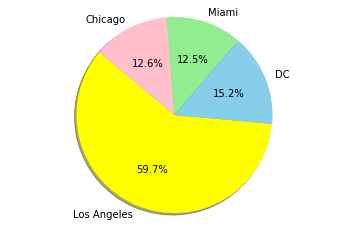

<Figure size 432x288 with 0 Axes>

In [9]:
# Labels for the sections of our pie chart
labels = ["Los Angeles", "DC", "Miami", "Chicago"]
colors = ["yellow", "skyblue", "lightgreen", "pink"]
# The values of each section of the pie chart
plt.pie(reservation_data, labels=labels,colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# The colors of each section of the pie chart
plt.axis("equal")
plt.show()

plt.savefig("ReservationPie")

C:\Users\leite\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


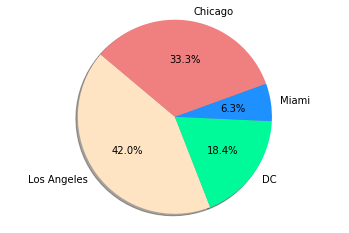

<Figure size 432x288 with 0 Axes>

In [10]:
# Labels for the sections of our pie chart
labels = ["Los Angeles", "DC", "Miami", "Chicago"]
colors = ["bisque", "mediumspringgreen", "dodgerblue", "lightcoral"]
# The values of each section of the pie chart
plt.pie(waitlist_data, labels=labels,colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# The colors of each section of the pie chart
plt.axis("equal")
plt.show()

plt.savefig("WaitListPie")